In [ ]:
!pip install pyspark

from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("My App")
sc = SparkContext(conf = conf)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=e5e668f576bbd91572129eba4a530d850d34dd65c01e06268eeab524e0a34678
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import datetime
import os, requests

yellow_data_map = {i:j for i, j in 
                   zip([2018, 2019, 2020, 2021], ['t29m-gskq', '2upf-qytp', 'kxp8-n2sj', 'm6nq-qud6'])}

base_url = "https://data.cityofnewyork.us/resource/%s.csv?$where=tpep_pickup_datetime between '%s' and '%s'&$$app_token=cI3JnQrXdEHduCveDbnckjLWp&pulocationid=43"

yellow_data_dir = 'data_of_yellow'
if not os.path.exists(yellow_data_dir):
    os.mkdir(yellow_data_dir)

k = 0
for year, keyname in yellow_data_map.items():
    start_datetime = datetime.datetime(year, 1, 1, 0, 0, 0)
    while True:
        end_datetime = start_datetime + datetime.timedelta(0, 60*60*3)
        s_m, s_d, s_h = start_datetime.month, start_datetime.day, start_datetime.hour
        e_m, e_d, e_h = end_datetime.month, end_datetime.day, end_datetime.hour
        start_datetime_str = '%d-%02d-%02dT%02d:00:00' % (year, s_m, s_d, s_h)
        end_datetime_str = '%d-%02d-%02dT%02d:00:00' % (year, e_m, e_d, e_h)
        start_datetime = end_datetime
        
        specific_url = base_url % (keyname, start_datetime_str, end_datetime_str)
        response = requests.get(specific_url)
        res_data = response.text
        
        with open(os.path.join(yellow_data_dir, 'data_%04d.csv' % (k)), 'w') as f:
            f.write(res_data)
        
        if end_datetime.year > year:
            break
        if k % 100 == 0:
            print(f'Complete Dowload: {start_datetime_str} to {end_datetime_str}')
        k += 1

Complete Dowload: 2018-01-01T00:00:00 to 2018-01-01T03:00:00
Complete Dowload: 2018-01-13T12:00:00 to 2018-01-13T15:00:00
Complete Dowload: 2018-01-26T00:00:00 to 2018-01-26T03:00:00
Complete Dowload: 2018-02-07T12:00:00 to 2018-02-07T15:00:00
Complete Dowload: 2018-02-20T00:00:00 to 2018-02-20T03:00:00
Complete Dowload: 2018-03-04T12:00:00 to 2018-03-04T15:00:00
Complete Dowload: 2018-03-17T00:00:00 to 2018-03-17T03:00:00
Complete Dowload: 2018-03-29T12:00:00 to 2018-03-29T15:00:00
Complete Dowload: 2018-04-11T00:00:00 to 2018-04-11T03:00:00
Complete Dowload: 2018-04-23T12:00:00 to 2018-04-23T15:00:00
Complete Dowload: 2018-05-06T00:00:00 to 2018-05-06T03:00:00
Complete Dowload: 2018-05-18T12:00:00 to 2018-05-18T15:00:00
Complete Dowload: 2018-05-31T00:00:00 to 2018-05-31T03:00:00
Complete Dowload: 2018-06-12T12:00:00 to 2018-06-12T15:00:00
Complete Dowload: 2018-06-25T00:00:00 to 2018-06-25T03:00:00
Complete Dowload: 2018-07-07T12:00:00 to 2018-07-07T15:00:00
Complete Dowload: 2018-0

In [ ]:
import os
import datetime
import requests

green_data_map = {i:j for i, j in 
                   zip([2018, 2019, 2020, 2021], ['w7fs-fd9i', 'q5mz-t52e', 'pkmi-4kfn', 'djnb-wcxt'])}

base_url = "https://data.cityofnewyork.us/resource/%s.csv?$where=lpep_pickup_datetime between '%s' and '%s'&$$app_token=cI3JnQrXdEHduCveDbnckjLWp"

green_data_dir = 'data_of_green'
if not os.path.exists(green_data_dir):
    os.mkdir(green_data_dir)

k = 0
for year, keyname in green_data_map.items():
    start_datetime = datetime.datetime(year, 1, 1, 0, 0, 0)
    while True:
        end_datetime = start_datetime + datetime.timedelta(0, 60*60*3)
        s_m, s_d, s_h = start_datetime.month, start_datetime.day, start_datetime.hour
        e_m, e_d, e_h = end_datetime.month, end_datetime.day, end_datetime.hour
        start_datetime_str = '%d-%02d-%02dT%02d:00:00' % (year, s_m, s_d, s_h)
        end_datetime_str = '%d-%02d-%02dT%02d:00:00' % (year, e_m, e_d, e_h)
        start_datetime = end_datetime
        
        specific_url = base_url % (keyname, start_datetime_str, end_datetime_str)
        response = requests.get(specific_url)
        res_data = response.text
        
        with open(os.path.join(green_data_dir, 'data_%04d.csv' % (k)), 'w') as f:
            f.write(res_data)
        
        if end_datetime.year > year:
            break
        if k % 100 == 0:
            print(f'Complete Dowload: {start_datetime_str} to {end_datetime_str}')
        k += 1

Complete Dowload: 2018-01-01T00:00:00 to 2018-01-01T03:00:00
Complete Dowload: 2018-01-13T12:00:00 to 2018-01-13T15:00:00
Complete Dowload: 2018-01-26T00:00:00 to 2018-01-26T03:00:00
Complete Dowload: 2018-02-07T12:00:00 to 2018-02-07T15:00:00
Complete Dowload: 2018-02-20T00:00:00 to 2018-02-20T03:00:00
Complete Dowload: 2018-03-04T12:00:00 to 2018-03-04T15:00:00
Complete Dowload: 2018-03-17T00:00:00 to 2018-03-17T03:00:00
Complete Dowload: 2018-03-29T12:00:00 to 2018-03-29T15:00:00
Complete Dowload: 2018-04-11T00:00:00 to 2018-04-11T03:00:00
Complete Dowload: 2018-04-23T12:00:00 to 2018-04-23T15:00:00
Complete Dowload: 2018-05-06T00:00:00 to 2018-05-06T03:00:00
Complete Dowload: 2018-05-18T12:00:00 to 2018-05-18T15:00:00
Complete Dowload: 2018-05-31T00:00:00 to 2018-05-31T03:00:00
Complete Dowload: 2018-06-12T12:00:00 to 2018-06-12T15:00:00
Complete Dowload: 2018-06-25T00:00:00 to 2018-06-25T03:00:00
Complete Dowload: 2018-07-07T12:00:00 to 2018-07-07T15:00:00
Complete Dowload: 2018-0

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Taxi').getOrCreate()

# For yellow taxi data
yellow_data_path_mode = 'data_of_yellow/data_*.csv'
yellow_taxi_dataframe = spark.read.csv(yellow_data_path_mode, header=True, inferSchema=True)
yellow_taxi_dataframe.show()

# For green taxi data
green_data_path_mode = 'data_of_green/data_*.csv'
green_taxi_dataframe = spark.read.csv(green_data_path_mode, header=True, inferSchema=True)
green_taxi_dataframe.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2|2019-05-08T15:00:...| 2019-05-08T15:11:...|              2|         1.28|         1|                 N|          43|         238|           1|          9|    0|    0.5|      2.46|           0|                  0.3

**Process**

In [ ]:
from pyspark.sql import functions as F
for c in green_taxi_dataframe.columns:
    miss_values = green_taxi_dataframe.agg(F.sum(F.column(c).isNull().cast('int'))).collect()[0][0]
    print(f'{c}: {miss_values}')

vendorid: 875697
lpep_pickup_datetime: 0
lpep_dropoff_datetime: 0
store_and_fwd_flag: 1039940
ratecodeid: 1039940
pulocationid: 0
dolocationid: 0
passenger_count: 1039940
trip_distance: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
ehail_fee: 7654796
improvement_surcharge: 0
total_amount: 0
payment_type: 1039940
trip_type: 1040130
congestion_surcharge: 4002922


In [ ]:
# Drop rows with none
yellow_taxi_dataframe = yellow_taxi_dataframe.dropna()
green_taxi_dataframe = green_taxi_dataframe.dropna(subset=['ehail_fee'])

from pyspark.sql.types import IntegerType
yellow_taxi_dataframe = yellow_taxi_dataframe.withColumn('passenger_count', 
                                    yellow_taxi_dataframe['passenger_count'].cast(IntegerType()))
green_taxi_dataframe = green_taxi_dataframe.withColumn('passenger_count', 
                                    green_taxi_dataframe['passenger_count'].cast(IntegerType()))

In [ ]:
yellow_taxi_dataframe = yellow_taxi_dataframe.withColumn('PU_Clock', yellow_taxi_dataframe['tpep_pickup_datetime'])
green_taxi_dataframe = green_taxi_dataframe.withColumn('PU_Clock', green_taxi_dataframe['lpep_pickup_datetime'])

yellow_taxi_dataframe = yellow_taxi_dataframe.withColumn('PU_Hour', F.hour(yellow_taxi_dataframe['PU_Clock']))
green_taxi_dataframe = green_taxi_dataframe.withColumn('PU_Hour', F.hour(green_taxi_dataframe['PU_Clock']))

In [ ]:
yellow_taxi_dataframe = yellow_taxi_dataframe.withColumn('distance_int', 
                                    yellow_taxi_dataframe['Trip_distance'].cast(IntegerType()))
green_taxi_dataframe = green_taxi_dataframe.withColumn('distance_int', 
                                    green_taxi_dataframe['Trip_distance'].cast(IntegerType()))

**The Relationship between tips and passenger_count**

In [ ]:
yellow_grouped_data = yellow_taxi_dataframe.groupBy('passenger_count').agg(F.avg('tip_amount').alias('tip_average_of_p')).\
                    sort('passenger_count')
yellow_tips_to_passengerCount_df = yellow_grouped_data.toPandas()
yellow_tips_to_passengerCount_df

,passenger_count,tip_average_of_p
0,0,1.891896
1,1,1.942422
2,2,1.943747
3,3,1.887928
4,4,1.734647
5,5,1.920578
6,6,1.969532
7,7,13.970000
8,8,12.776667
9,9,14.000000


In [ ]:
green_grouped_data = green_taxi_dataframe.groupBy('passenger_count').agg(F.avg('tip_amount').alias('tip_average_of_p')).\
                    sort('passenger_count')
green_tips_to_passengerCount_df = green_grouped_data.toPandas()
green_tips_to_passengerCount_df

,passenger_count,tip_average_of_p
0,1,1.629000
1,2,1.702966
2,3,1.104706


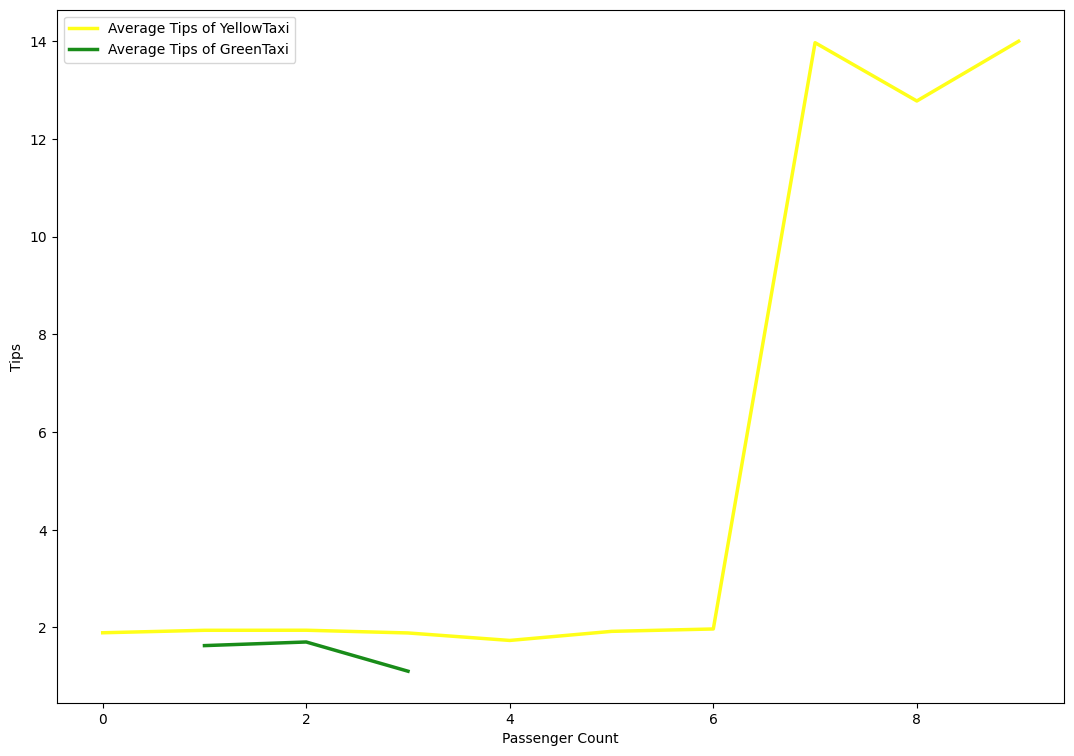

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(13, 9))
ax = figure.add_subplot(111)
plt.plot(yellow_tips_to_passengerCount_df['passenger_count'].values, 
         yellow_tips_to_passengerCount_df['tip_average_of_p'],
         color='yellow', lw=2.5, alpha=0.9, label='Average Tips of YellowTaxi')
plt.plot(green_tips_to_passengerCount_df['passenger_count'].values, 
         green_tips_to_passengerCount_df['tip_average_of_p'],
         color='green', lw=2.5, alpha=0.9, label='Average Tips of GreenTaxi')
plt.xlabel('Passenger Count')
plt.ylabel('Tips')
plt.legend(loc='best')

Clearly, in yellow taxis, when the number of passengers is less than 6, the fare amount is almost the same. However, when the number of passengers exceeds 6, the fare amount increases significantly. This might be related to the different vehicle types used for 6 or more passengers. Green taxis are obviously smaller vehicles. When there is only one passenger or two passengers, the tips are higher, but when the number of passengers is 3, the tip amount is significantly lower compared to yellow taxis.

**The Relationship between tips and pickup_time**

In [ ]:
yellow_grouped_data = yellow_taxi_dataframe.groupBy('PU_Hour').agg(F.avg('tip_amount').alias('tip_average_of_H')).\
                    sort('PU_Hour')
yellow_tips_to_hour_df = yellow_grouped_data.toPandas()
yellow_tips_to_hour_df

,PU_Hour,tip_average_of_H
0,0,1.904465
1,1,1.855861
2,2,1.733314
3,3,2.220533
4,4,3.338063
5,5,2.926819
6,6,2.212182
7,7,2.028009
8,8,2.042663
9,9,1.980815


In [ ]:
green_grouped_data = green_taxi_dataframe.groupBy('PU_Hour').agg(F.avg('tip_amount').alias('tip_average_of_H')).\
                    sort('PU_Hour')
green_tips_to_hour_df = green_grouped_data.toPandas()
green_tips_to_hour_df

,PU_Hour,tip_average_of_H
0,0,1.776842
1,1,2.156923
2,2,1.000000
3,3,1.464545
4,4,1.653333
5,15,1.545556
6,16,0.000000
7,18,1.732647
8,19,1.200000
9,21,1.551818


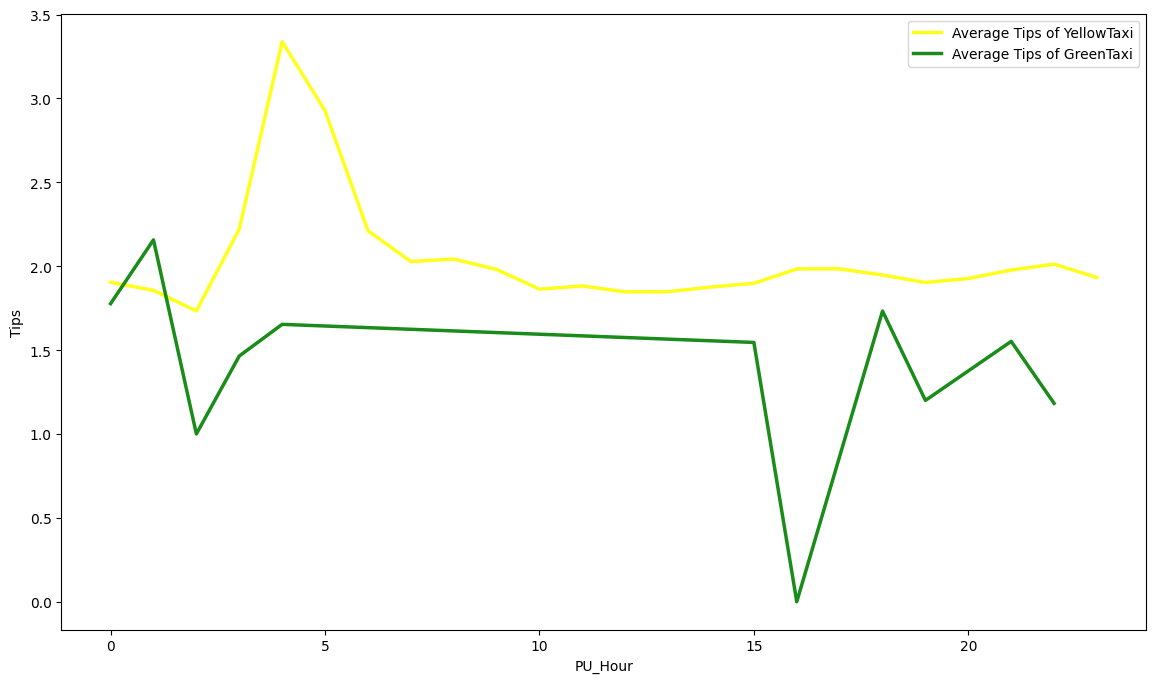

In [ ]:
figure = plt.figure(figsize=(14, 8))
ax = figure.add_subplot(111)
plt.plot(yellow_tips_to_hour_df['PU_Hour'].values, yellow_tips_to_hour_df['tip_average_of_H'].values,
        color='yellow', lw=2.5, alpha=0.9, label='Average Tips of YellowTaxi')
plt.plot(green_tips_to_hour_df['PU_Hour'].values, green_tips_to_hour_df['tip_average_of_H'].values,
        color='green', lw=2.5, alpha=0.9, label='Average Tips of GreenTaxi')
plt.xlabel('PU_Hour')
plt.ylabel('Tips')
plt.legend(loc='best')

In every time period, the tips for green taxis are lower than those for yellow taxis. Furthermore, yellow taxis receive higher tips between 3 am and 5 am.

**The Relationship between tips and DOLocationID**

In [ ]:
yellow_grouped_data = yellow_taxi_dataframe.groupBy('DOLocationID').agg(F.avg('tip_amount').alias('tip_average_of_DO')).\
                    sort('tip_average_of_DO')
yellow_tips_to_doid_df = yellow_grouped_data.toPandas()
yellow_tips_to_doid_df.tail(10)

,DOLocationID,tip_average_of_DO
249,187,12.425000
250,5,12.500000
251,27,12.750000
252,118,13.272857
253,84,16.095000
254,214,16.446000
255,109,17.010000
256,251,17.187500
257,176,17.980000
258,204,20.710000


In [ ]:
green_grouped_data = green_taxi_dataframe.groupBy('DOLocationID').agg(F.avg('tip_amount').alias('tip_average_of_DO')).\
                    sort('tip_average_of_DO')
green_tips_to_doid_df = green_grouped_data.toPandas()
green_tips_to_doid_df.tail(10)

,DOLocationID,tip_average_of_DO
49,113,3.71
50,141,3.71
51,33,3.76
52,107,4.39
53,48,4.41
54,234,4.81
55,179,6.64
56,230,7.82
57,165,7.96
58,127,10.51


Text(0.5, 1.0, 'Green Taxi')

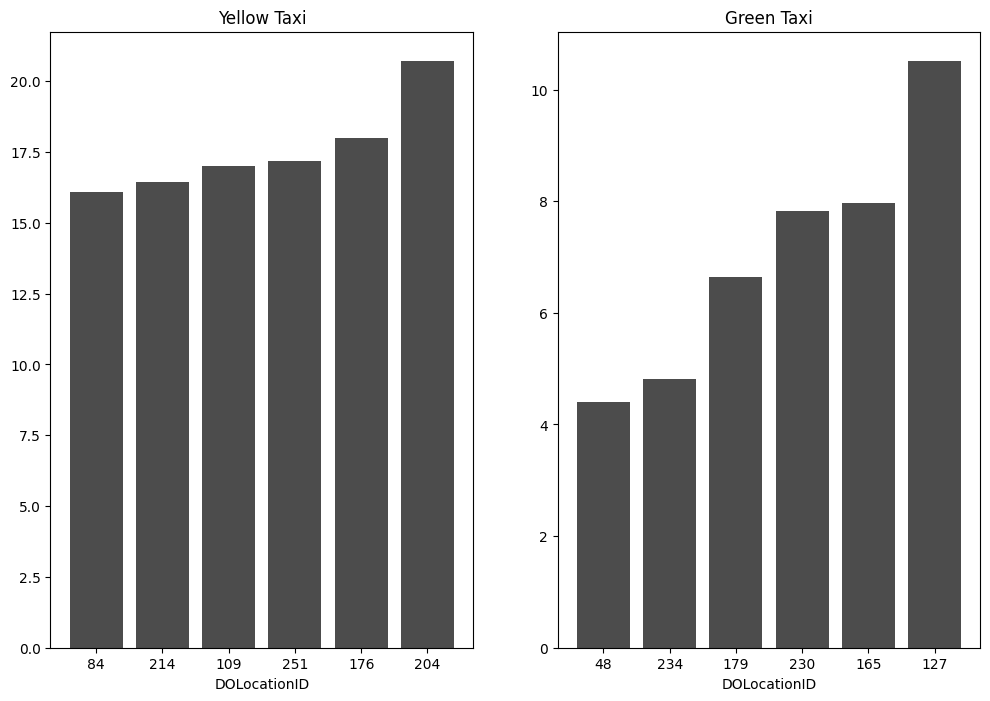

In [ ]:
figure = plt.figure(figsize=(12, 8))
ax_1 = figure.add_subplot(121)
xs = yellow_tips_to_doid_df.tail(6)['DOLocationID'].values
ys = yellow_tips_to_doid_df.tail(6)['tip_average_of_DO'].values
plt.bar(range(len(ys)), ys, color='k', alpha=0.7)
plt.xticks(range(len(ys)), xs)
plt.xlabel('DOLocationID')
plt.title('Yellow Taxi')

ax_2 = figure.add_subplot(122)
xs = green_tips_to_doid_df.tail(6)['DOLocationID'].values
ys = green_tips_to_doid_df.tail(6)['tip_average_of_DO'].values
plt.bar(range(len(ys)), ys, color='k', alpha=0.7)
plt.xticks(range(len(ys)), xs)
plt.xlabel('DOLocationID')
plt.title('Green Taxi')

Clearly, for both taxi companies, it is the more remote areas with larger encoding values that receive higher tip amounts.

**The Relationship between tips and Trip_distance**

In [ ]:
yellow_grouped_data = yellow_taxi_dataframe.groupBy('distance_int').agg(F.avg('tip_amount').alias('tip_average_of_Dis')).\
                    sort('distance_int')
yellow_tips_to_doid_df = yellow_grouped_data.toPandas()
yellow_tips_to_doid_df

,distance_int,tip_average_of_Dis
0,0,1.203425
1,1,1.611690
2,2,2.076646
3,3,2.632662
4,4,3.129807
...,...,...
81,169,0.000000
82,183,55.080000
83,228,5.050000
84,305,8.450000


In [ ]:
green_grouped_data = green_taxi_dataframe.groupBy('distance_int').agg(F.avg('tip_amount').alias('tip_average_of_Dis')).\
                    sort('distance_int')
green_tips_to_doid_df = green_grouped_data.toPandas()
green_tips_to_doid_df

,distance_int,tip_average_of_Dis
0,0,0.656333
1,1,1.040833
2,2,1.697143
3,3,1.874348
4,4,1.820000
5,5,2.564615
6,6,4.050000
7,7,5.410000
8,9,3.540000
9,10,0.000000


Text(0.5, 0, 'Distance')

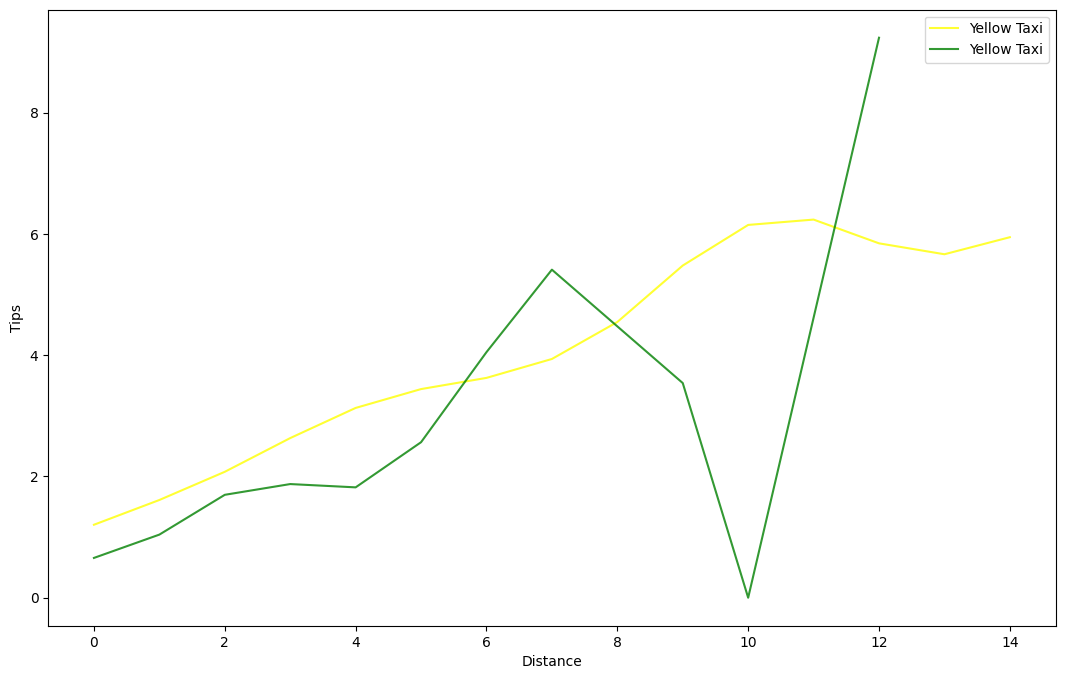

In [ ]:
figure = plt.figure(figsize=(13, 8))
ax = figure.add_subplot(111)
xs = yellow_tips_to_doid_df.head(15)['distance_int'].values
ys = yellow_tips_to_doid_df.head(15)['tip_average_of_Dis'].values
plt.plot(xs, ys, color='yellow', lw=1.5, alpha=0.8, label='Yellow Taxi')
xs = green_tips_to_doid_df.head(15)['distance_int'].values
ys = green_tips_to_doid_df.head(15)['tip_average_of_Dis'].values
plt.plot(xs, ys, color='green', lw=1.5, alpha=0.8, label='Yellow Taxi')
plt.legend(loc='best')
plt.ylabel('Tips')
plt.xlabel('Distance')

In [1]:
from flask import Flask, jsonify
import pandas as pd
import json

# Create the Flask app
app = Flask(__name__)

# Define the route for the root URL
@app.route('/', methods=['GET'])
def home():
    return "Welcome to the Taxi Data API. Please use the /api/taxi_data endpoint to get the taxi data."

# Define the route for the API
@app.route('/api/taxi_data', methods=['GET'])
def get_taxi_data():
    # Here, you can use the processed DataFrames to return the data as JSON
    yellow_taxi_data = yellow_tips_to_doid_df.to_dict(orient='records')
    green_taxi_data = green_tips_to_doid_df.to_dict(orient='records')

    # Return the data as JSON
    return jsonify({'yellow_taxi': yellow_taxi_data, 'green_taxi': green_taxi_data})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
